In [1]:
print("""
Tasks

Load and describe Iris, Wine, Breast Cancer datasets

Visualize feature distributions and correlations

Analyze class imbalances

Show decision boundaries for 2D projections

Compare dataset complexity metrics

Add narrative text explaining findings
""")


Tasks

Load and describe Iris, Wine, Breast Cancer datasets

Visualize feature distributions and correlations

Analyze class imbalances

Show decision boundaries for 2D projections

Compare dataset complexity metrics

Add narrative text explaining findings



In [7]:
#Utility function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris, load_wine, load_breast_cancer 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from collections import Counter
sns.set(style="whitegrid", context="notebook")

In [8]:
# Cell 3: Load Datasets
def dataset_to_df(loader):
    data = loader() 
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df["target"] = data.target 
    df["target_name"] = df["target"].map(lambda i: data.target_names[i] if hasattr(data, "target_names") else i) 
    return df, data

In [9]:
# Cell 4: Feature Distributions
iris_df, iris = dataset_to_df(load_iris)
wine_df, wine = dataset_to_df(load_wine) 
bc_df, bc = dataset_to_df(load_breast_cancer) 
print("✓ Datasets loaded") 
print(f"Iris shape: {iris_df.shape}") 
print(f"Wine shape: {wine_df.shape}") 
print(f"Breast Cancer shape: {bc_df.shape}")

✓ Datasets loaded
Iris shape: (150, 6)
Wine shape: (178, 15)
Breast Cancer shape: (569, 32)



## Iris Feature Distributions


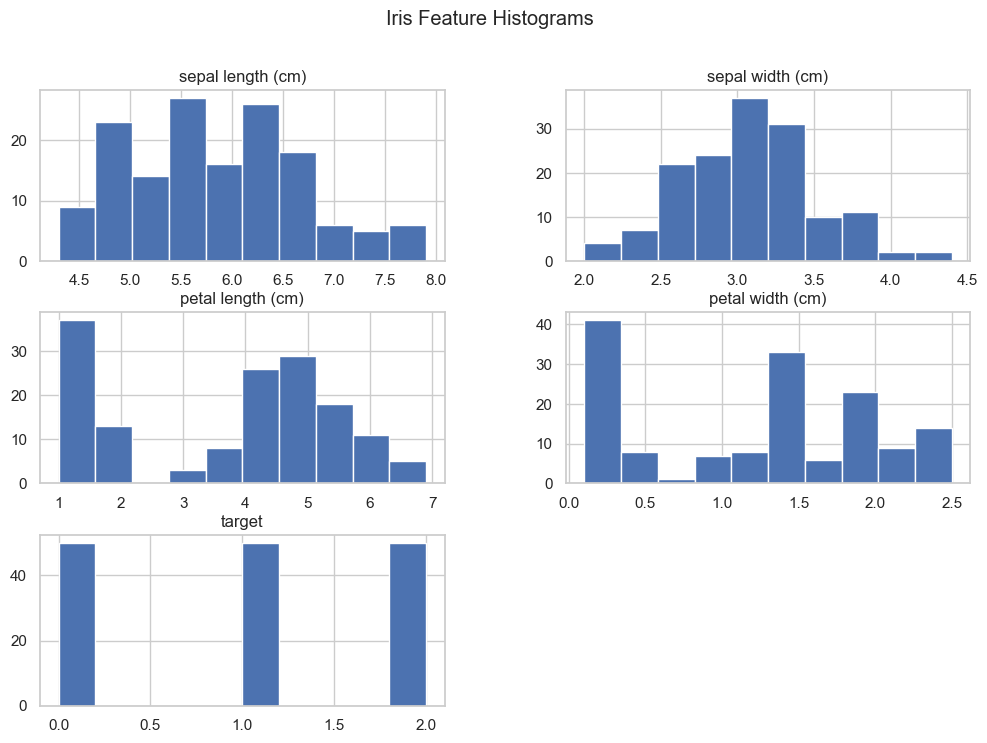


## Wine Feature Distributions


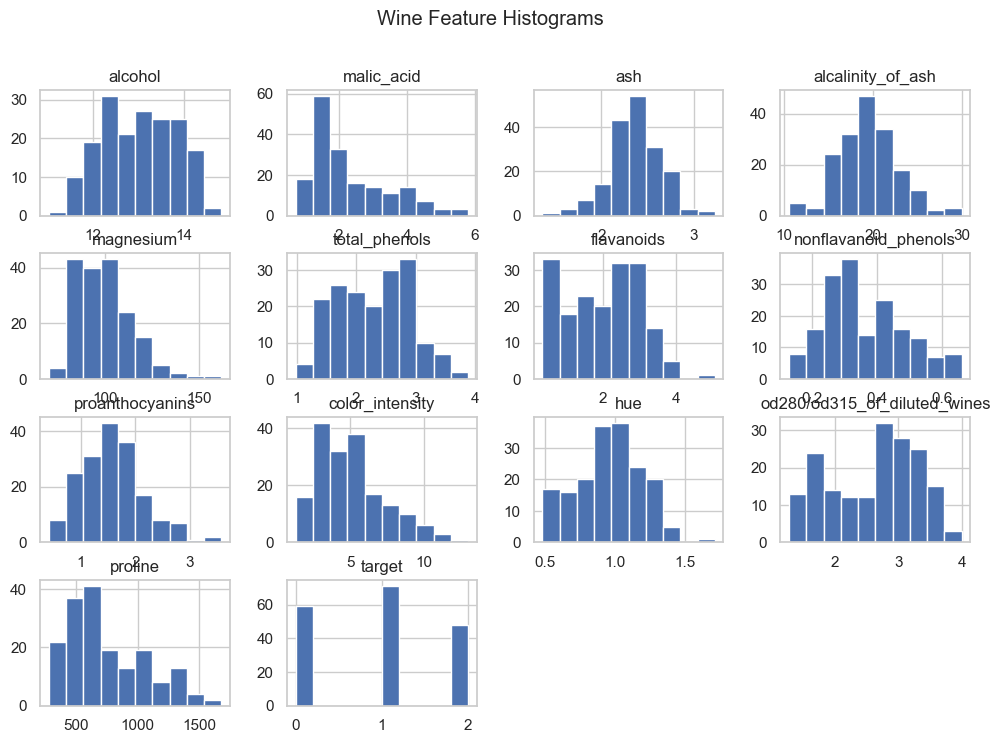


## Breast Cancer Feature Distributions


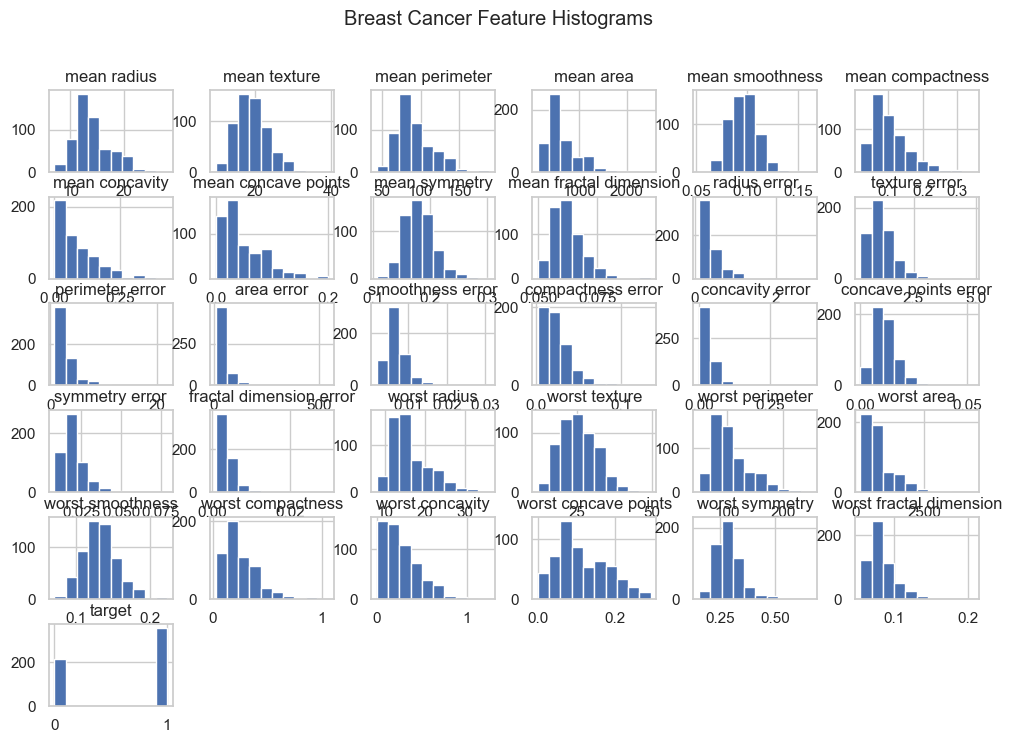

In [10]:
# Cell 5: Correlation Heatmaps
for name, df in [("Iris", iris_df), ("Wine", wine_df), ("Breast Cancer", bc_df)]: 
    print(f"\n## {name} Feature Distributions")
    df.hist(figsize=(12, 8)) 
    plt.suptitle(f"{name} Feature Histograms") 
    plt.show()

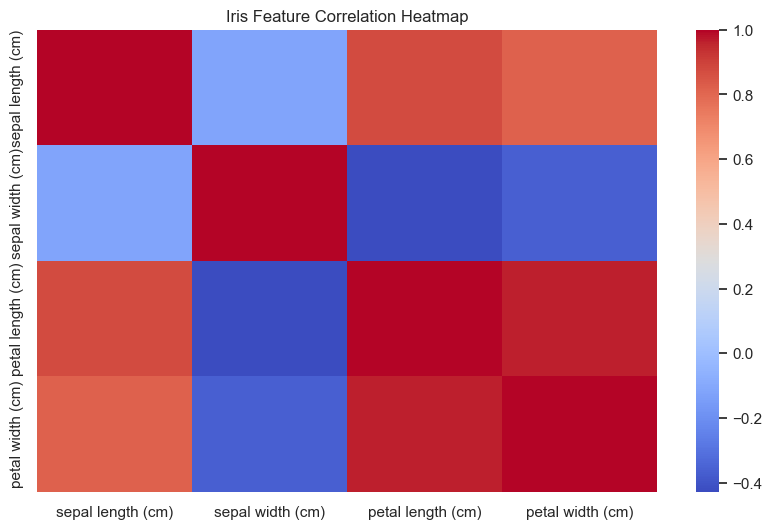

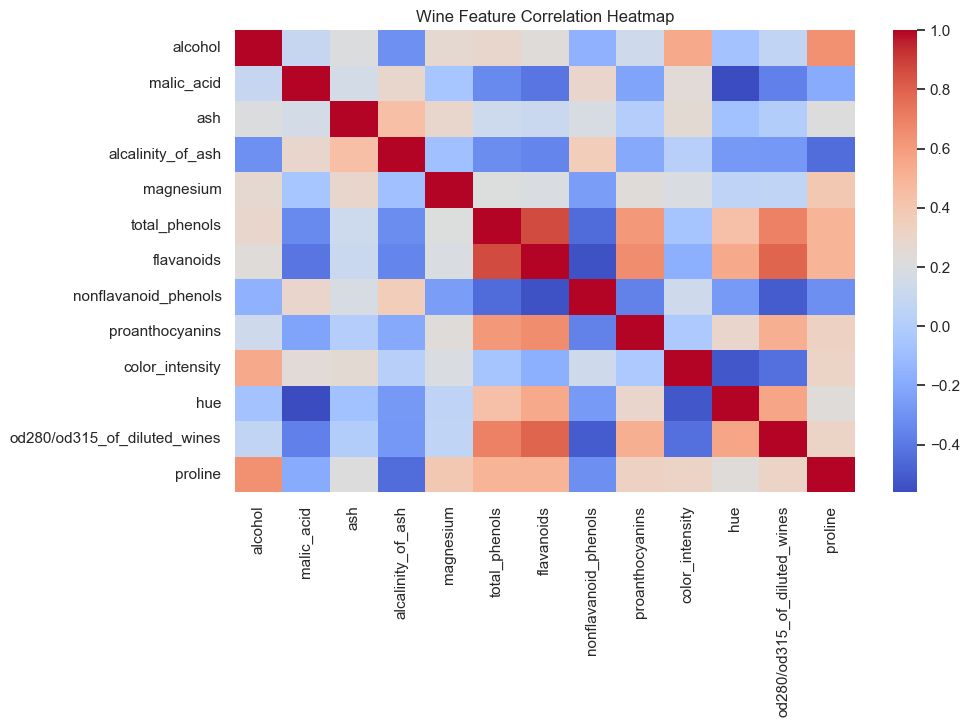

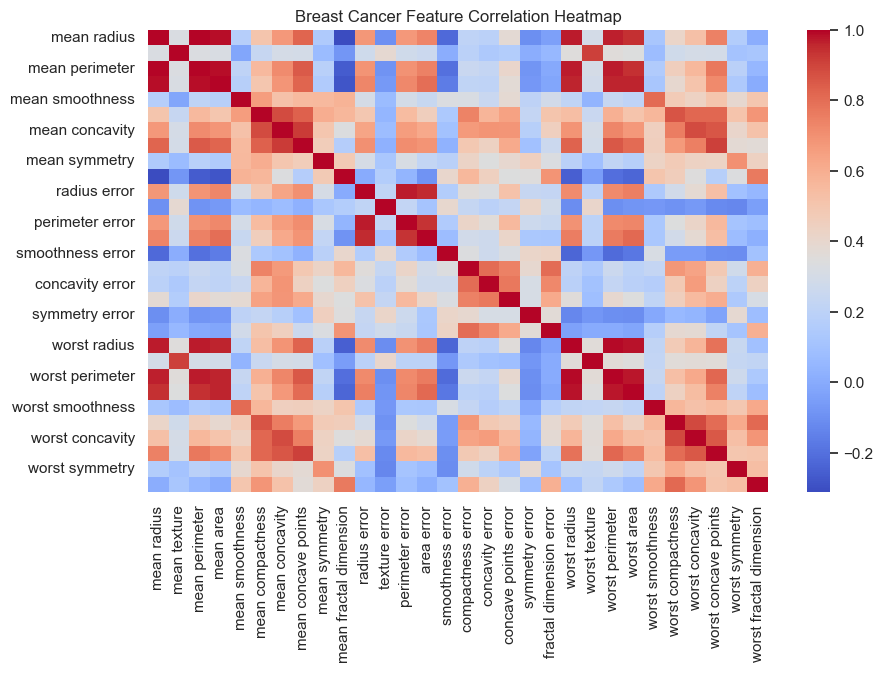

In [11]:
# Cell 6: Class Imbalance
for name, df in [("Iris", iris_df), ("Wine", wine_df), ("Breast Cancer", bc_df)]:
    plt.figure(figsize=(10, 6)) 
    sns.heatmap(df.drop(columns=["target", "target_name"]).corr(), cmap="coolwarm", annot=False) 
    plt.title(f"{name} Feature Correlation Heatmap") 
    plt.show()

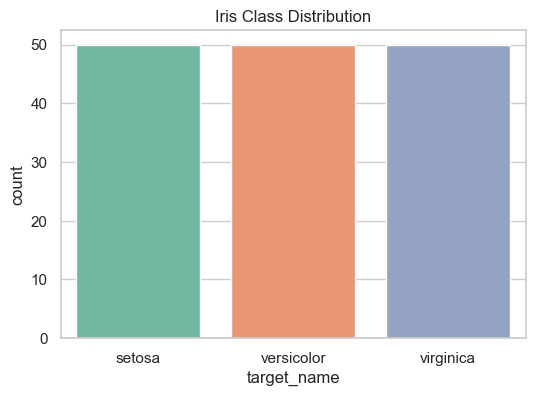

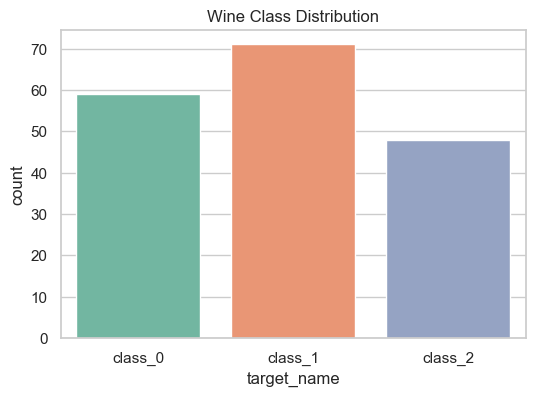

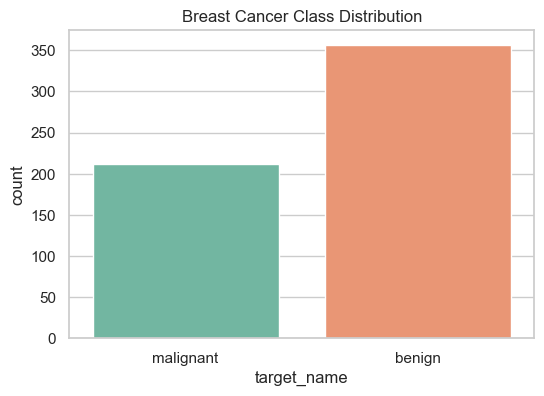

In [19]:
# Cell 6: Class Imbalance 
for name, df in [("Iris", iris_df), ("Wine", wine_df), ("Breast Cancer", bc_df)]: 
    plt.figure(figsize=(6, 4)) 
    sns.countplot(x="target_name", hue="target_name", data=df, palette="Set2", legend=False)
    plt.title(f"{name} Class Distribution")
    plt.show()

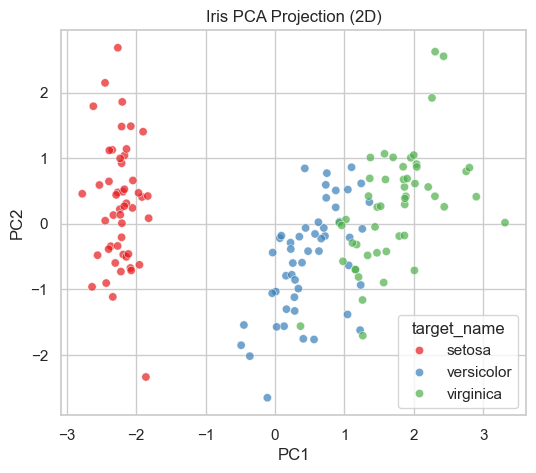

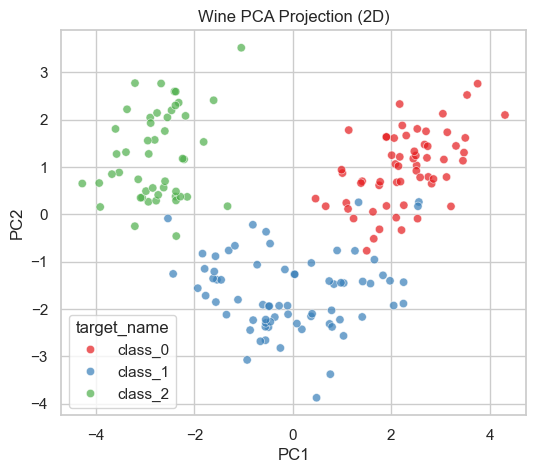

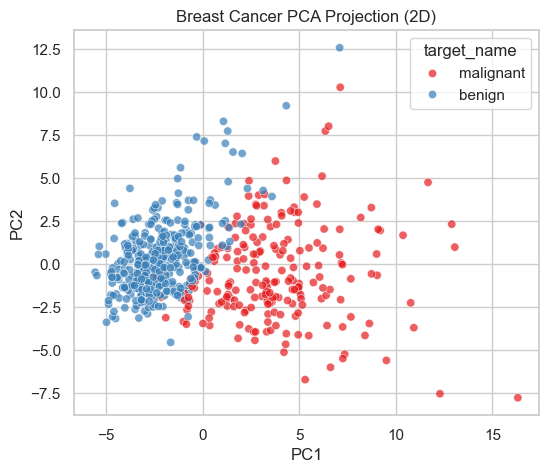

In [14]:
# Cell 7: Decision Boundaries (2D PCA projection) 
for name, df in [("Iris", iris_df), ("Wine", wine_df), ("Breast Cancer", bc_df)]: 
    X = df.drop(columns=["target", "target_name"]) 
    y = df["target_name"] 
    X_scaled = StandardScaler().fit_transform(X) 
    pca = PCA(n_components=2) 
    X_pca = pca.fit_transform(X_scaled) 
    plt.figure(figsize=(6, 5)) 
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.7) 
    plt.title(f"{name} PCA Projection (2D)") 
    plt.xlabel("PC1") 
    plt.ylabel("PC2")
    plt.show()

In [21]:
# Cell 8: Dataset Complexity Metrics
from collections import Counter

def complexity_metrics(df, name):
    X = df.drop(columns=["target", "target_name"])
    y = df["target"] 
    print(f"\n## {name} Complexity Metrics") 
    print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
    print(f"Classes: {len(np.unique(y))}") 
    print(f"Class distribution: {Counter(y)}") 
    print(f"Feature ranges: {[ (col, (X[col].min(), X[col].max())) for col in X.columns[:5] ]} ...")

# Now call the function for each dataset
for dataset_name, dataset_df in [("Iris", iris_df), ("Wine", wine_df), ("Breast Cancer", bc_df)]:
    complexity_metrics(dataset_df, dataset_name)



## Iris Complexity Metrics
Samples: 150, Features: 4
Classes: 3
Class distribution: Counter({0: 50, 1: 50, 2: 50})
Feature ranges: [('sepal length (cm)', (4.3, 7.9)), ('sepal width (cm)', (2.0, 4.4)), ('petal length (cm)', (1.0, 6.9)), ('petal width (cm)', (0.1, 2.5))] ...

## Wine Complexity Metrics
Samples: 178, Features: 13
Classes: 3
Class distribution: Counter({1: 71, 0: 59, 2: 48})
Feature ranges: [('alcohol', (11.03, 14.83)), ('malic_acid', (0.74, 5.8)), ('ash', (1.36, 3.23)), ('alcalinity_of_ash', (10.6, 30.0)), ('magnesium', (70.0, 162.0))] ...

## Breast Cancer Complexity Metrics
Samples: 569, Features: 30
Classes: 2
Class distribution: Counter({1: 357, 0: 212})
Feature ranges: [('mean radius', (6.981, 28.11)), ('mean texture', (9.71, 39.28)), ('mean perimeter', (43.79, 188.5)), ('mean area', (143.5, 2501.0)), ('mean smoothness', (0.05263, 0.1634))] ...


In [22]:
#finsished